# DIGITAL ASSESSMENT 1
                                BASIL JACOB (18BCE0956)
                                   IMAGE PROCESSING     

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def display_img(img):
    fig=plt.figure(figsize=(12,10))
    ax=fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

In [3]:
img=cv2.imread('C:\\Users\\DELL\\Documents\\Image_processing_DA\\Image_covid19\\COVID-19 (2).png',0)

In [4]:
type(img)

numpy.ndarray

In [5]:
img

array([[15, 14, 14, ..., 12,  1, 44],
       [13, 13, 13, ..., 12,  2, 46],
       [12, 12, 12, ..., 13,  4, 48],
       ...,
       [11, 11, 11, ..., 12,  2, 46],
       [10, 10, 10, ..., 12,  2, 46],
       [10, 10, 10, ..., 12,  2, 46]], dtype=uint8)

# ORIGINAL IMAGE 

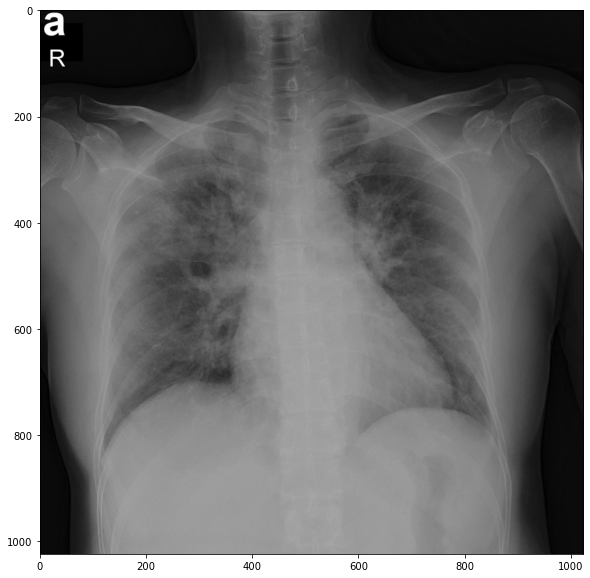

In [6]:
display_img(img)

# LAPLACIAN OF ORIGINAL IMAGE

In [7]:
#Remove noise by blurring with a Gaussian filter

In [8]:
ddepth=cv2.CV_16S
kernel_size=3

In [9]:
src = cv2.GaussianBlur(img, (3, 3), 0)

In [10]:
#Apply laplacian tranformation operator

In [11]:
laplaced_img = cv2.Laplacian(src, ddepth, ksize=kernel_size)

In [12]:
abs_laplaced_img=cv2.convertScaleAbs(laplaced_img)

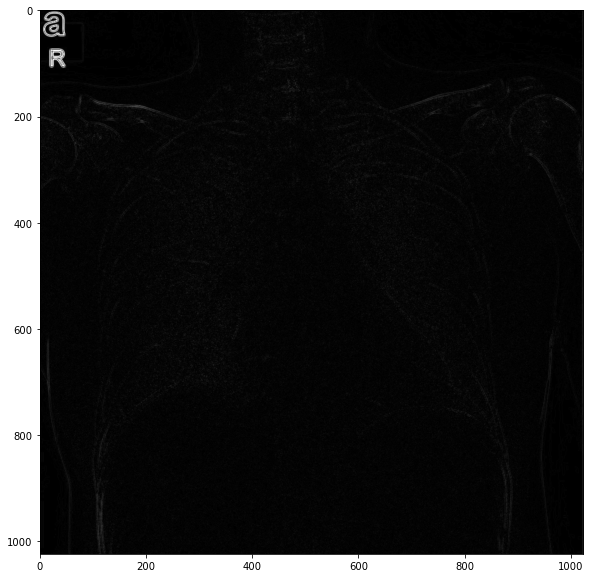

In [13]:
display_img(abs_laplaced_img)

# LAPLACIAN SHARPENED IMAGE

In [14]:
sharpened_img=img+abs_laplaced_img

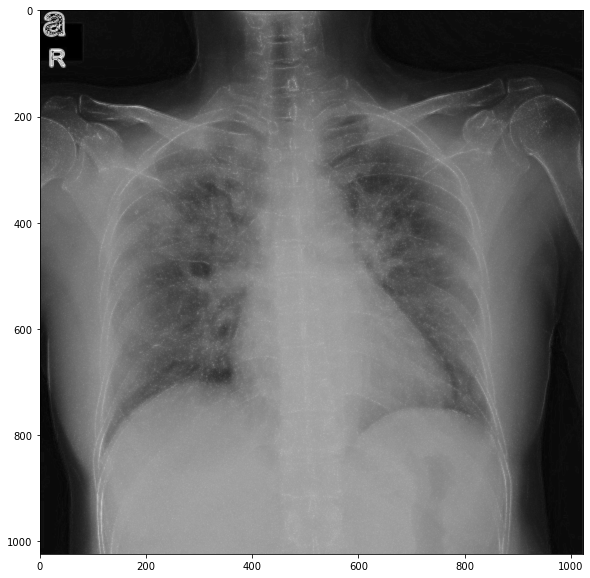

In [15]:
display_img(sharpened_img)

# SOBEL GRADIENT OF ORIGINAL IMAGE

In [16]:
scale = 1
delta = 0
ddepth = cv2.CV_16S

In [17]:
sobel_src=cv2.GaussianBlur(img,(3,3),0)

In [18]:
# Gradient-X 
grad_x = cv2.Sobel(sobel_src, ddepth, 1, 0, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)

In [19]:
#Gradient-Y
grad_y = cv2.Sobel(sobel_src, ddepth, 0, 1, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)

In [20]:
abs_grad_x=cv2.convertScaleAbs(grad_x)
abs_grad_y=cv2.convertScaleAbs(grad_y)

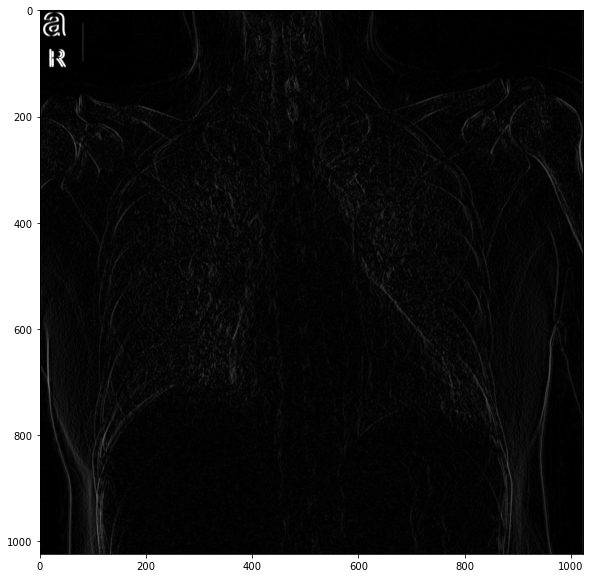

In [21]:
display_img(abs_grad_x)

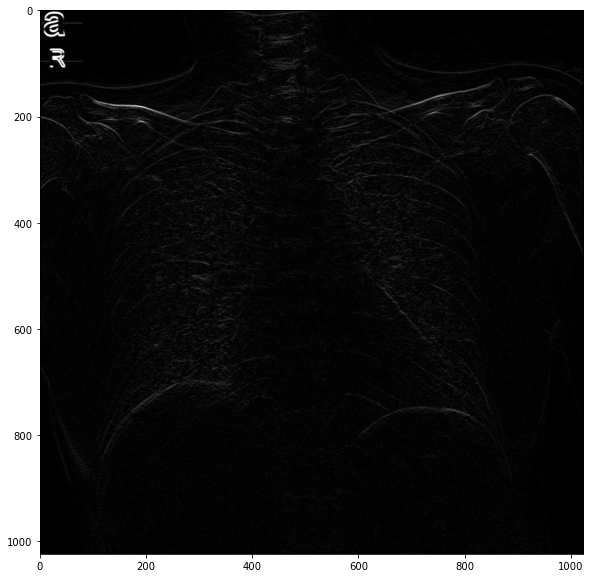

In [22]:
display_img(abs_grad_y)

In [23]:
sobel_grad=cv2.addWeighted(abs_grad_x,0.2,abs_grad_y,0.8,0)

In [24]:
sobel_img=sobel_grad+img

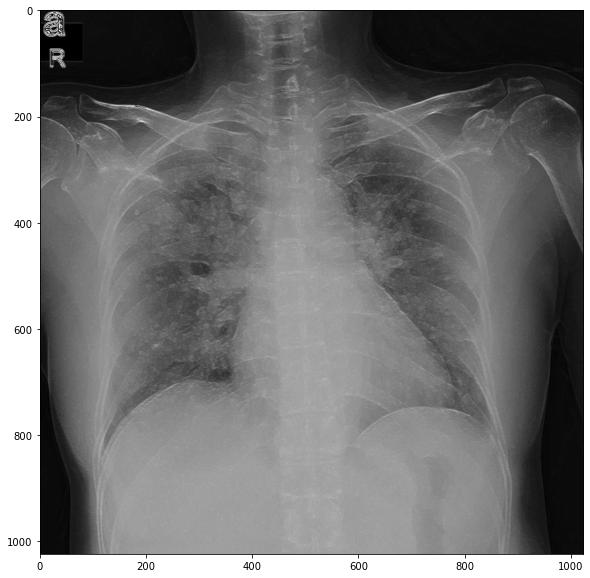

In [25]:
display_img(sobel_img)

# WIENER FILTER APPLIED TO SOBEL IMAGE TO OBTAIN SMOOTHENED IMAGE

In [26]:
def wiener_filter(img,kernel,K):
    kernel/=np.sum(kernel)
    dummy=np.copy(img)
    dummy=np.fft.fft2(dummy)
    kernel=np.fft.fft2(kernel,s=img.shape)
    kernel=np.conj(kernel)/(np.abs(kernel)**2 + K)
    dummy=dummy*kernel
    dummy=np.abs(np.fft.ifft2(dummy))
    
    return dummy

In [27]:
blurred_img=cv2.GaussianBlur(sobel_img,(5,5),7)

In [28]:
# Apply Wiener Filter

kernel=cv2.getGaussianKernel(ksize=3,sigma=10)
wiener_filtered_img=wiener_filter(blurred_img,kernel,K=10)

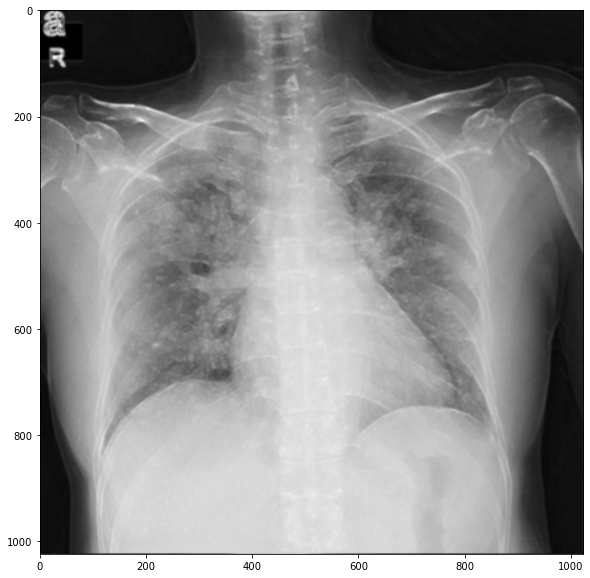

In [29]:
display_img(wiener_filtered_img)

# PRODUCT OF SHARPENED AND SMOOTHENED IMAGE

In [30]:
product_img=sharpened_img*wiener_filtered_img

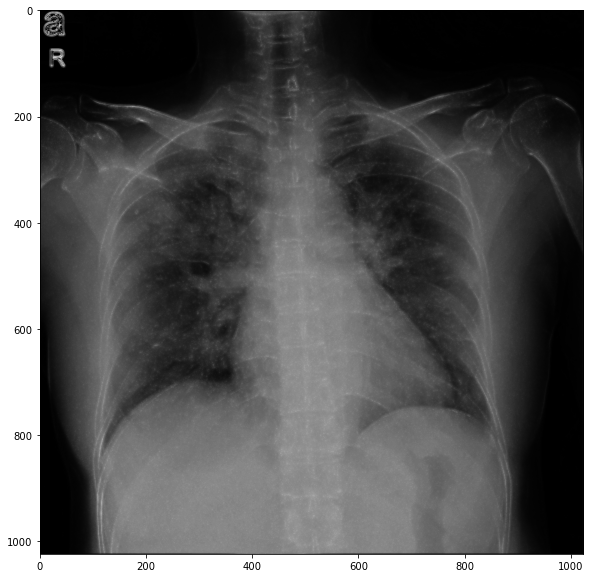

In [31]:
display_img(product_img)

# POWER LAW TRANSFORMATION

In [32]:
# Apply gamma correction. 
gamma=0.3
gamma_corrected = np.array(255*(product_img / 255) ** gamma, dtype = 'uint8')

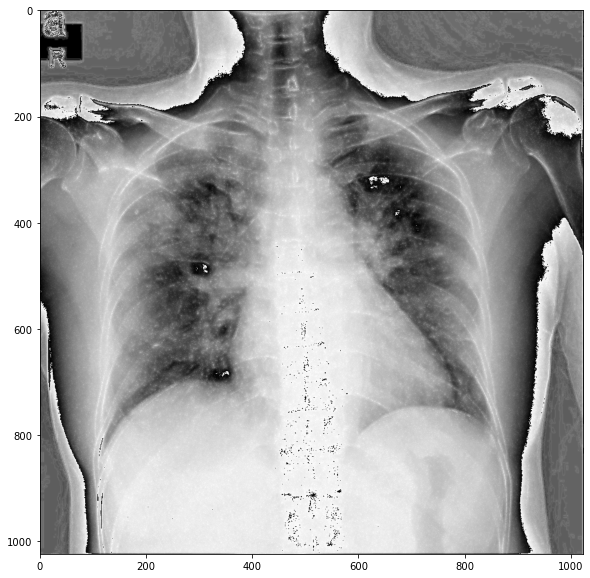

In [33]:
display_img(gamma_corrected)

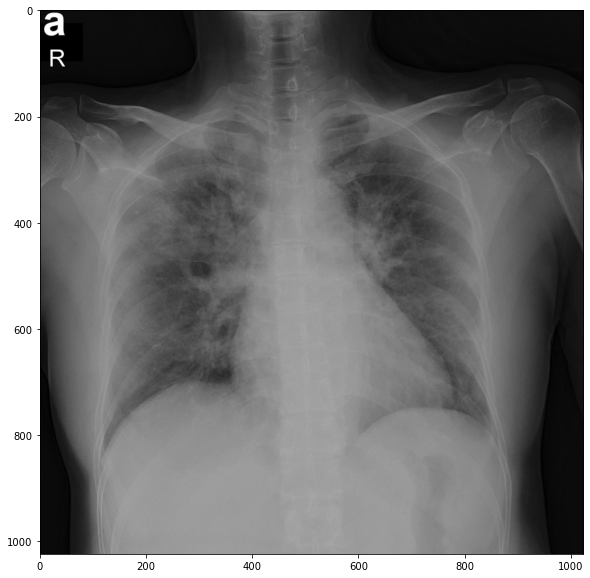

In [34]:
display_img(img)

# DIGITAL ASSESSMENT 2


                                 NAME : BASIL JACOB
                                 ROLL NO: 18BCE0956

In [35]:
#Continuation of DA1

# ENHANCED IMAGE

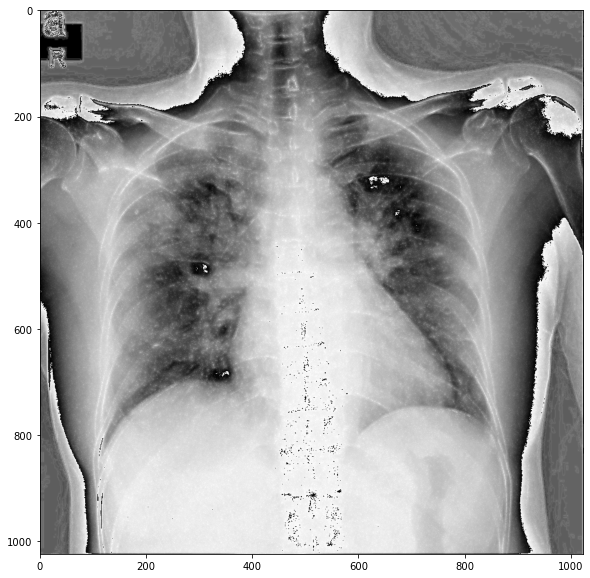

In [36]:
display_img(gamma_correctedgamma_corrected)

# APPLICATION OF GAUSSIAN FILTER 

In [37]:
gaussian_blur=cv2.GaussianBlur(gamma_corrected,(7,7),2.15,2.15)

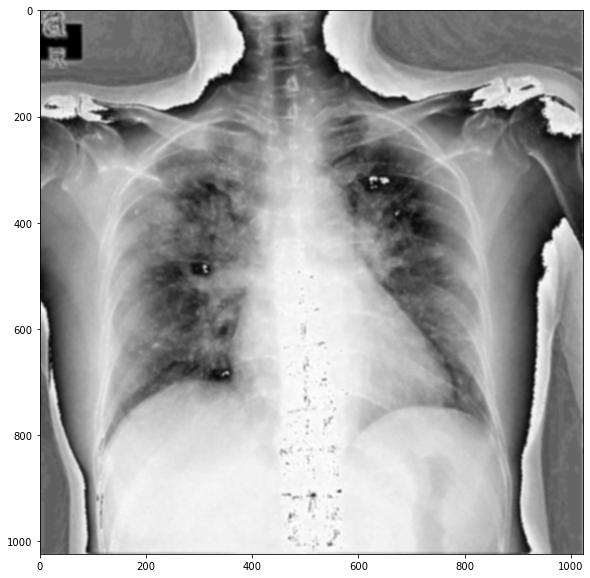

In [38]:
display_img(gaussian_blur)

# APPLICATION OF FIRST DERIVATIVE ( SOBEL OPERATION )

In [39]:
# Gradient-X 
grad_x = cv2.Sobel(gaussian_blur, ddepth, 1, 0, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)

In [40]:
#Gradient-Y
grad_y = cv2.Sobel(gaussian_blur, ddepth, 0, 1, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)

In [41]:
abs_grad_x=cv2.convertScaleAbs(grad_x)
abs_grad_y=cv2.convertScaleAbs(grad_y)

In [42]:
sobel_grad=cv2.addWeighted(abs_grad_x,0.9,abs_grad_y,0.8,0)

In [43]:
opening = cv2.morphologyEx(sobel_grad, cv2.MORPH_OPEN, kernel)

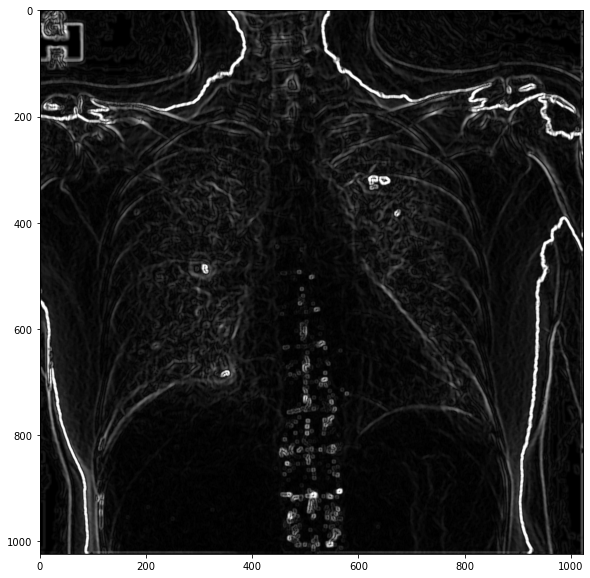

In [44]:
display_img(opening)

# SAUVOLA IMAGE THRESHOLDING APPLIED ON THE GRADIENT IMAGE

In [45]:
from skimage.data import page
from skimage.filters import (threshold_otsu, threshold_niblack,threshold_sauvola)

In [46]:
window_size = 255

In [47]:
thresh_sauvola = threshold_sauvola(gamma_corrected, window_size=window_size)

In [48]:
binary_sauvola = gamma_corrected > thresh_sauvola

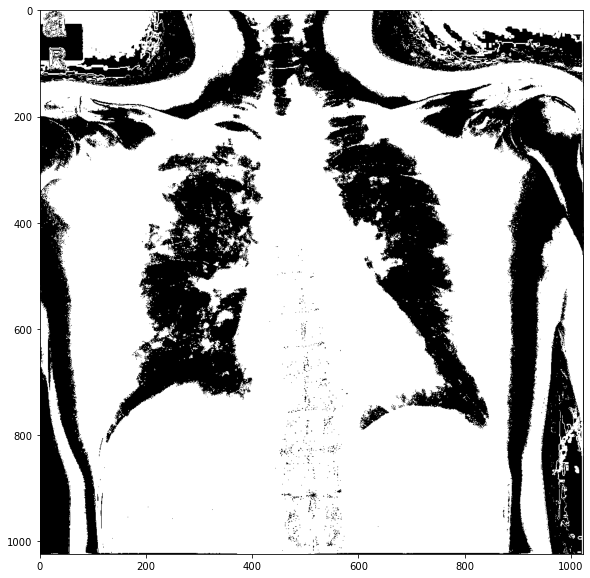

In [49]:
display_img(binary_sauvola)

# GRADIENT AVERAGE IMAGE COMBINED WITH INNER HIGHLIGHTED IMAGE

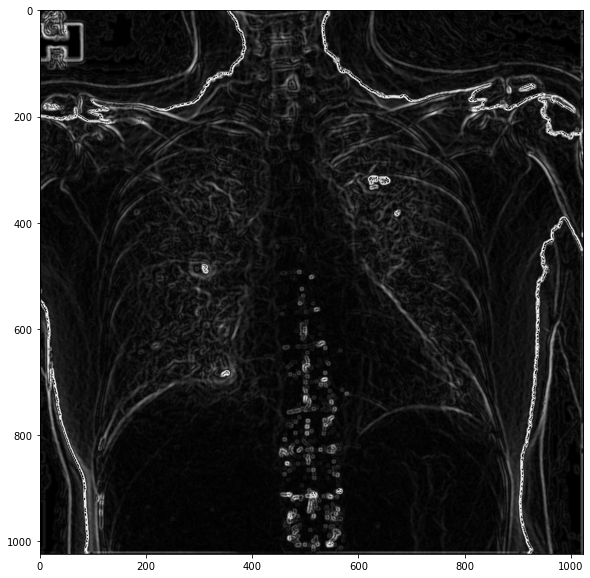

In [50]:
display_img(sobel_grad+binary_sauvola)

# CREATION OF THE MASK FOCUSSING ON THE LUNG SECTIONS 

In [51]:
ret,mask = cv2.threshold(gamma_corrected,115,255,cv2.THRESH_BINARY_INV)

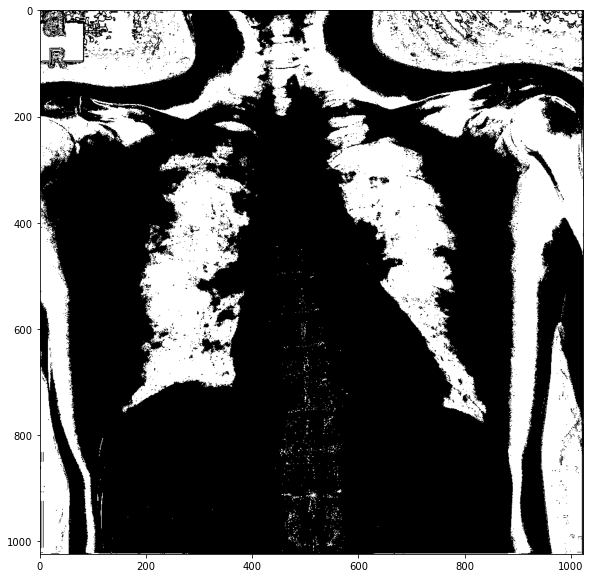

In [52]:
display_img(mask)

In [53]:
h, w = img.shape[:2]
for row in range(h):
    if mask[row, 0] == 255:
        cv2.floodFill(mask, None, (0, row), 0)
    if mask[row, w-1] == 255:
        cv2.floodFill(mask, None, (w-1, row), 0)
for col in range(w):
    if mask[0, col] == 255:
        cv2.floodFill(mask, None, (col, 0), 0)
    if mask[h-1, col] == 255:
        cv2.floodFill(mask, None, (col, h-1), 0)


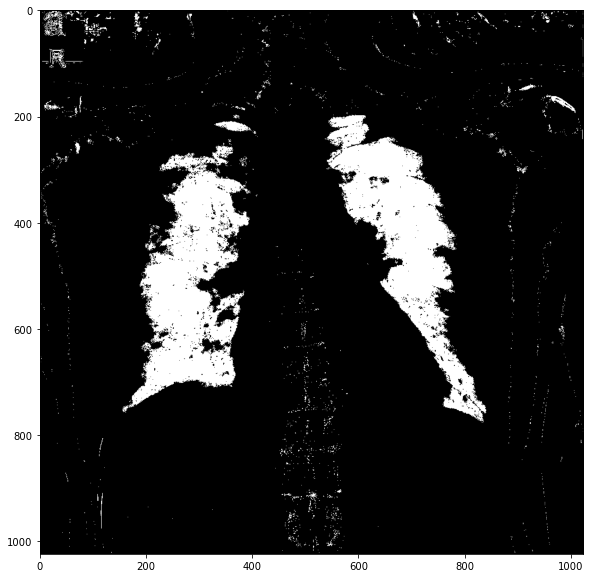

In [54]:
display_img(mask)

In [55]:
holes = mask.copy()
cv2.floodFill(holes, None, (0, 0), 255)

(926953,
 array([[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]], dtype=uint8),
 None,
 (0, 0, 1024, 1024))

In [56]:
# invert holes mask, bitwise or with mask to fill in holes
holes = cv2.bitwise_not(holes)
mask = cv2.bitwise_or(mask, holes)

# THE MASK PROVIDING PROPER SEGMENTED LUNG SECTION

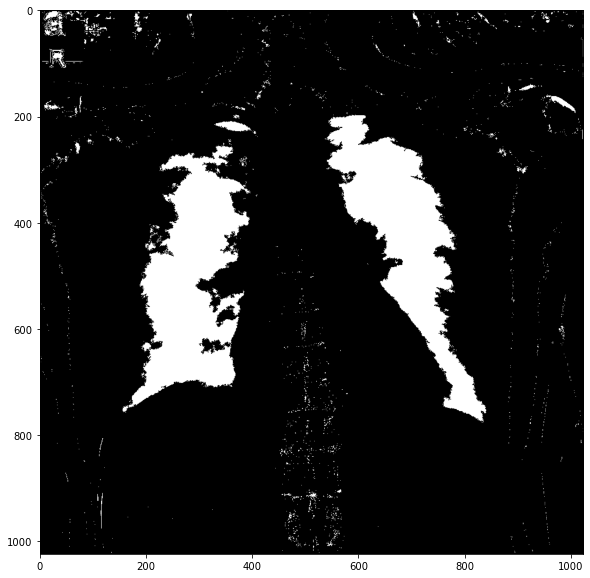

In [57]:
display_img(mask)

# MASKED IMAGE FORMED UPON TAKING "AND" OPERATION OF COMBINED IMAGE AND  THE LUNG MASK

In [58]:
masked_img = cv2.bitwise_and((sobel_grad+binary_sauvola), mask)

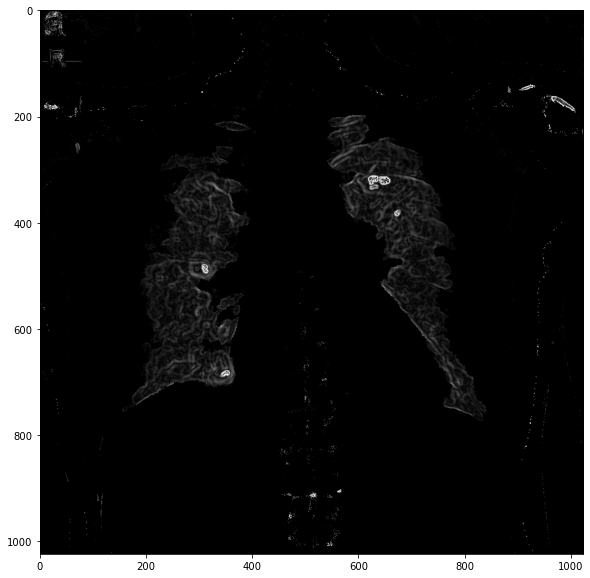

In [59]:
display_img(masked_img)

# MORPHOLOGICAL OPERATIONS APPLIED TO GENERATE FINAL IMAGE

In [60]:
closing = cv2.morphologyEx(masked_img, cv2.MORPH_CLOSE, kernel)


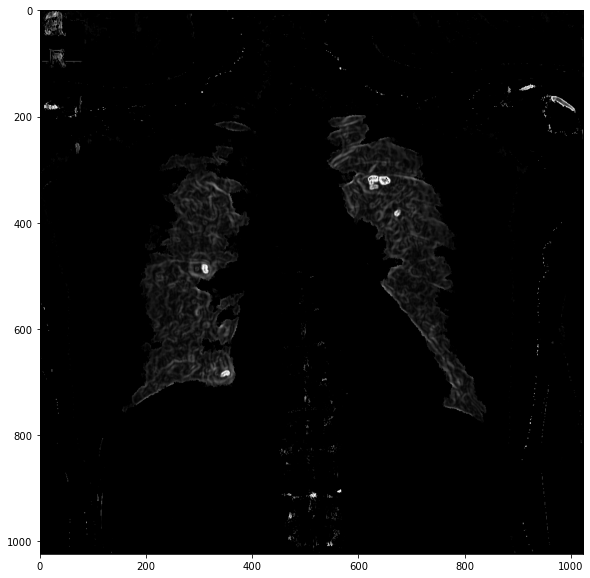

In [61]:
display_img(closing)

In [62]:
final_img = cv2.dilate(closing,kernel,iterations = 1)

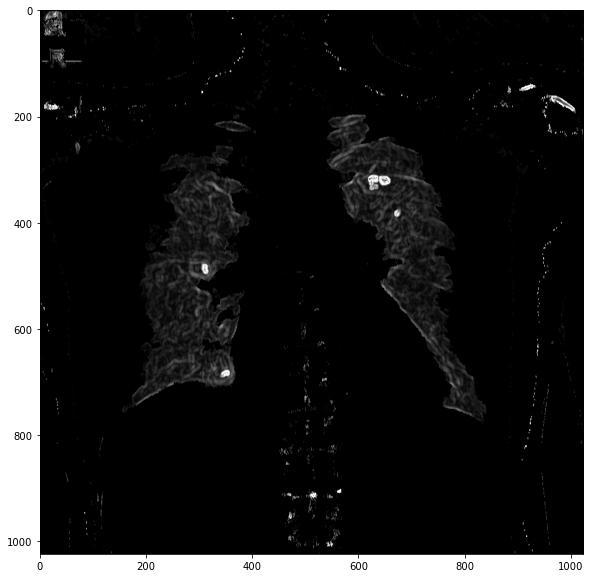

In [63]:
display_img(final_img)

In [64]:
def display_img_final(img):
    fig=plt.figure(figsize=(12,10))
    ax=fig.add_subplot(111)
    ax.imshow(img,cmap='plasma')

# ENHANCED VERSION FOCUSSING ON A ROI

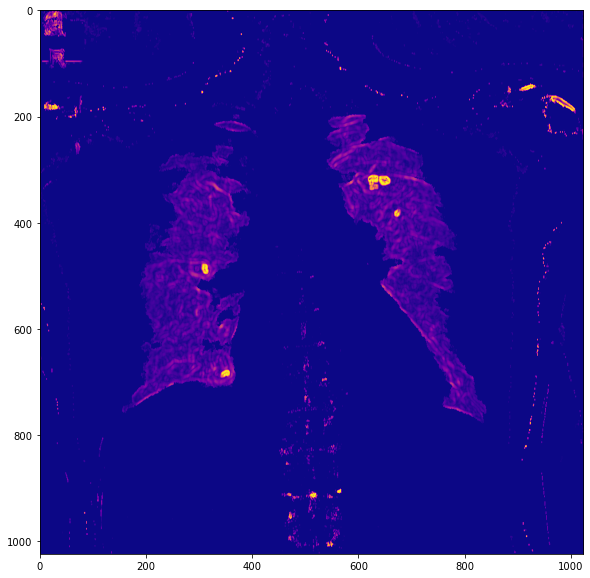

In [65]:
display_img_final(final_img)

In [66]:
import os

In [67]:
# Filename 
filename = 'Enhanced_image.jpg'
  
# Using cv2.imwrite() method 
# Saving the image 
cv2.imwrite(filename, gamma_corrected) 

True